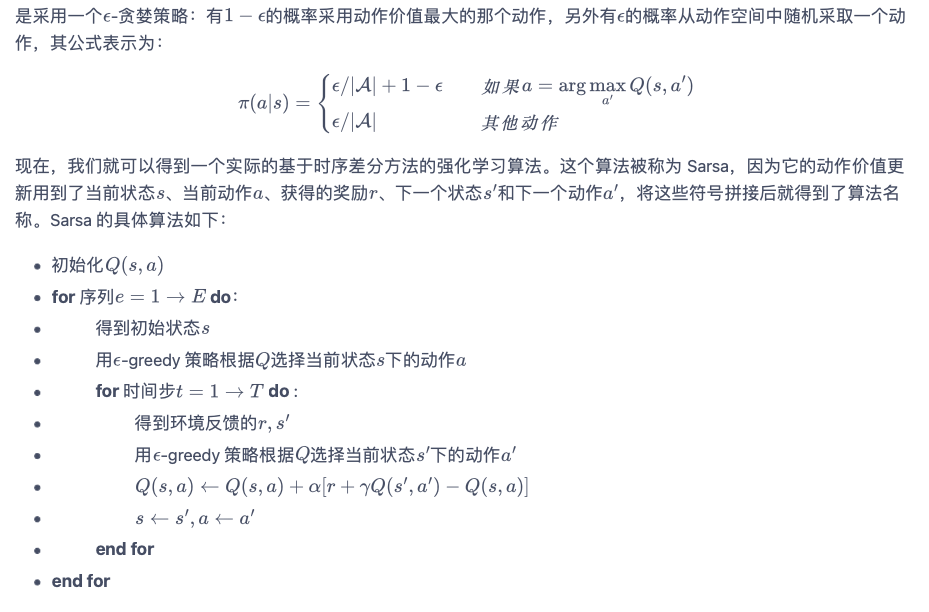

In [1]:
import torch
import gym
from cliffwalking import CliffWalkingWapper
from qlearning import QLearning

set config and load the environment 

In [2]:
env = gym.make('CliffWalking-v0')
env = CliffWalkingWapper(env)
seed = 1
env.reset(seed=seed)  # 设置随机种子
n_states = env.observation_space.n  # 状态维度
n_actions = env.action_space.n  # 动作维度
# for _ in range(1000):
#     env.render()
#     action = env.action_space.sample()
#     observation, reward, done, info = env.step(action)

#     if done:
#         observation, info = env.reset(return_info=True)
# env.close()

/Users/dengsiyuan/opt/anaconda3/envs/regular/lib/python3.9/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/dengsiyuan/opt/anaconda3/envs/regular/lib/python3.9/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
import datetime
import argparse
import matplotlib.pyplot as plt
#import seaborn as sns


def get_args():
    """ 
    """
    curr_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")  # 获取当前时间
    parser = argparse.ArgumentParser(description="hyperparameters")
    parser.add_argument('--algo_name', default='Q-learning',
                        type=str, help="name of algorithm")
    parser.add_argument('--env_name', default='CliffWalking-v0',
                        type=str, help="name of environment")
    parser.add_argument('--seed', default=1, type=int, help='seed for env generation')
    parser.add_argument('--train_eps', default=400, type=int,
                        help="episodes of training")  # 训练的回合数
    parser.add_argument('--test_eps', default=20, type=int,
                        help="episodes of testing")  # 测试的回合数
    parser.add_argument('--gamma', default=0.90, type=float,
                        help="discounted factor")  # 折扣因子
    parser.add_argument('--epsilon', default=0.95, type=float,
                        help="initial value of epsilon")  # e-greedy策略中初始epsilon
    parser.add_argument('--epsilon_min', default=0.01, type=float,
                        help="final value of epsilon")  # e-greedy策略中的终止epsilon
    parser.add_argument('--epsilon_decay', default=0.99, type=float,
                        help="decay rate of epsilon")  # e-greedy策略中epsilon的衰减率
    parser.add_argument('--alpha', default=0.1,
                        type=float, help="learning rate")
    parser.add_argument('--device', default='cpu',
                        type=str, help="cpu or cuda")
    args = parser.parse_args([])
    return args


curr_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")  # 获取当前时间

In [4]:
def train(env, agent, cfg):
    print('开始训练！')
    print(f'环境:{cfg.env_name}, 算法:{cfg.algo_name}, 设备:{cfg.device}')
    rewards = []  # 记录奖励
    for i_ep in range(cfg.train_eps):
        ep_reward = 0  # 记录每个episode的reward
        state = env.reset()  # 重置环境,即开始新的回合
        while True:
            action = agent.choose_action(state)  # 根据算法采样一个动作
            next_state, reward, done, _ = env.step(action)  # 与环境进行一次动作交互
            agent.update(state, action, reward, next_state, done)  # Q学习算法更新
            state = next_state  # 更新状态
            ep_reward += reward
            if done:
                break
        rewards.append(ep_reward)
        print(
            f"回合：{i_ep+1}/{cfg.train_eps}，奖励：{ep_reward:.1f}，Epsilon：{agent.epsilon}")
    print('完成训练！')
    return {"rewards": rewards}

In [5]:
def test(env, agent, cfg):
    print('开始测试！')
    print(f'环境：{cfg.env_name}, 算法：{cfg.algo_name}, 设备：{cfg.device}')
    rewards = []  # 记录所有回合的奖励
    for i_ep in range(cfg.test_eps):
        ep_reward = 0  # 记录每个episode的reward
        state = env.reset()  # 重置环境, 重新开一局（即开始新的一个回合）
        while True:
            action = agent.predict(state)  # 根据算法选择一个动作
            next_state, reward, done, _ = env.step(action)  # 与环境进行一个交互
            state = next_state  # 更新状态
            ep_reward += reward
            if done:
                break
        rewards.append(ep_reward)
        print(f"回合数：{i_ep+1}/{cfg.test_eps}, 奖励：{ep_reward:.1f}")
    print('完成测试！')
    return {"rewards": rewards}

In [6]:
cfg = get_args()
env = gym.make(cfg.env_name)
env = CliffWalkingWapper(env)
env.seed(cfg.seed)  # 设置随机种子
n_states = env.observation_space.n  # 状态维度
n_actions = env.action_space.n  # 动作维度
agent = QLearning(n_states, n_actions, 
                  gamma=cfg.gamma, alpha=cfg.alpha,
                  epsilon=cfg.epsilon, epsilon_decay=cfg.epsilon_decay, epsilon_min=cfg.epsilon_min)

/Users/dengsiyuan/opt/anaconda3/envs/regular/lib/python3.9/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/dengsiyuan/opt/anaconda3/envs/regular/lib/python3.9/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/Users/dengsiyuan/opt/anaconda3/envs/regular/lib/python3.9/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [7]:
#train 
training_rewards = train(env,agent,cfg)

开始训练！
环境:CliffWalking-v0, 算法:Q-learning, 设备:cpu
回合：1/400，奖励：-2389.0，Epsilon：0.009910645744379363
回合：2/400，奖励：-211.0，Epsilon：0.009910645744379363
回合：3/400，奖励：-191.0，Epsilon：0.009910645744379363
回合：4/400，奖励：-164.0，Epsilon：0.009910645744379363
回合：5/400，奖励：-276.0，Epsilon：0.009910645744379363
回合：6/400，奖励：-128.0，Epsilon：0.009910645744379363
回合：7/400，奖励：-222.0，Epsilon：0.009910645744379363
回合：8/400，奖励：-94.0，Epsilon：0.009910645744379363
回合：9/400，奖励：-155.0，Epsilon：0.009910645744379363
回合：10/400，奖励：-259.0，Epsilon：0.009910645744379363
回合：11/400，奖励：-157.0，Epsilon：0.009910645744379363
回合：12/400，奖励：-123.0，Epsilon：0.009910645744379363
回合：13/400，奖励：-137.0，Epsilon：0.009910645744379363
回合：14/400，奖励：-71.0，Epsilon：0.009910645744379363
回合：15/400，奖励：-195.0，Epsilon：0.009910645744379363
回合：16/400，奖励：-33.0，Epsilon：0.009910645744379363
回合：17/400，奖励：-358.0，Epsilon：0.009910645744379363
回合：18/400，奖励：-105.0，Epsilon：0.009910645744379363
回合：19/400，奖励：-67.0，Epsilon：0.009910645744379363
回合：20/400，奖励：-138.0，Epsilon：0.009

回合：319/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：320/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：321/400，奖励：-15.0，Epsilon：0.009910645744379363
回合：322/400，奖励：-31.0，Epsilon：0.009910645744379363
回合：323/400，奖励：-14.0，Epsilon：0.009910645744379363
回合：324/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：325/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：326/400，奖励：-120.0，Epsilon：0.009910645744379363
回合：327/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：328/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：329/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：330/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：331/400，奖励：-14.0，Epsilon：0.009910645744379363
回合：332/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：333/400，奖励：-15.0，Epsilon：0.009910645744379363
回合：334/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：335/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：336/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：337/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：338/400，奖励：-13.0，Epsilon：0.009910645744379363
回合：339/400，奖励：-13.0

In [6]:
def smooth(data, weight=0.9):  
    '''用于平滑曲线，类似于Tensorboard中的smooth

    Args:
        data (List):输入数据
        weight (Float): 平滑权重，处于0-1之间，数值越高说明越平滑，一般取0.9

    Returns:
        smoothed (List): 平滑后的数据
    '''
    last = data[0]  # First value in the plot (first timestep)
    smoothed = list()
    for point in data:
        smoothed_val = last * weight + (1 - weight) * point  # 计算平滑值
        smoothed.append(smoothed_val)                    
        last = smoothed_val                                
    return smoothed

def plot_rewards(rewards,cfg, tag='train'):
    import seaborn as sns
    sns.set()
    plt.figure()  # 创建一个图形实例，方便同时多画几个图
    plt.title("learning curve on {} of {} for {}".format(
        cfg.device, cfg.algo_name, cfg.env_name))
    plt.xlabel('epsiodes')
    plt.plot(rewards, label='rewards')
    plt.plot(smooth(rewards), label='smoothed')
    plt.legend()
    plt.show()

In [7]:
plot_rewards(training_rewards['rewards'], cfg, tag="train")  

NameError: name 'training_rewards' is not defined

开始测试！
环境：CliffWalking-v0, 算法：Q-learning, 设备：cpu
回合数：1/20, 奖励：-13.0
回合数：2/20, 奖励：-13.0
回合数：3/20, 奖励：-13.0
回合数：4/20, 奖励：-13.0
回合数：5/20, 奖励：-13.0
回合数：6/20, 奖励：-13.0
回合数：7/20, 奖励：-13.0
回合数：8/20, 奖励：-13.0
回合数：9/20, 奖励：-13.0
回合数：10/20, 奖励：-13.0
回合数：11/20, 奖励：-13.0
回合数：12/20, 奖励：-13.0
回合数：13/20, 奖励：-13.0
回合数：14/20, 奖励：-13.0
回合数：15/20, 奖励：-13.0
回合数：16/20, 奖励：-13.0
回合数：17/20, 奖励：-13.0
回合数：18/20, 奖励：-13.0
回合数：19/20, 奖励：-13.0
回合数：20/20, 奖励：-13.0
完成测试！


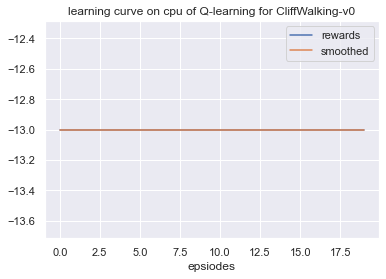

In [10]:
# 测试
res_dic = test(env, agent,cfg)
plot_rewards(res_dic['rewards'], cfg, tag="test")  # 画出结果

In [11]:
# random choose action
random_step_num = []
for _ in range(100):   
    observation, info = env.reset(return_info=True)
    step_num=0
    while True:
        
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        step_num += 1
        if done:
            break
    random_step_num.append(step_num)

print(f'随机策略100轮平均步数：{sum(random_step_num)/len(random_step_num)}')


随机策略100轮平均步数：5986.84


In [12]:
policy_step_num=[]
for _ in range(100):
    observation, info = env.reset(return_info=True,seed=1)
    step_num=0
    while True:     
        action = agent.predict(observation)
        observation, reward, done, info = env.step(action)
        step_num += 1
        if done:
            break
    policy_step_num.append(step_num)

print(f'随机策略100轮平均步数：{sum(policy_step_num)/len(policy_step_num)}')

随机策略100轮平均步数：13.0


In [11]:
from gym.utils import play
observation, info = env.reset(return_info=True,seed=1)
done=False
while True:  
    if done:
        break
    env.render()
    action = agent.predict(observation)
    observation, reward, done, info = env.step(action)
env.render()
observation, info = env.reset(return_info=True,seed=1)
env.close()